# Task 4

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [2]:
data = pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Data Preprocessing and all Properties

In [3]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

## Describing data

In [4]:
data.describe

<bound method NDFrame.describe of            Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code

In [5]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

## Checking NA values

In [6]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## Droping Unnecessary Column

In [7]:
data = data.drop(['Postal Code'] , axis = 1)

## Correlation

In [8]:
correlation = data.corr()
print(correlation)

             Sales  Quantity  Discount    Profit
Sales     1.000000  0.200795 -0.028190  0.479064
Quantity  0.200795  1.000000  0.008623  0.066253
Discount -0.028190  0.008623  1.000000 -0.219487
Profit    0.479064  0.066253 -0.219487  1.000000


## Heatmap

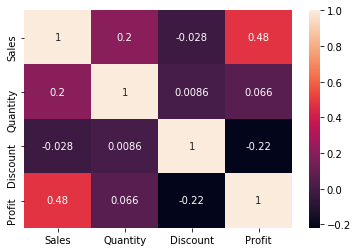

In [9]:
sns.heatmap(correlation , xticklabels = correlation.columns , yticklabels = correlation.columns , annot = True)

There is strong positive correlation between sales price and profit and negative correlation between discount and sales price

# Visualizing Data

## Barplot between Region and Profit

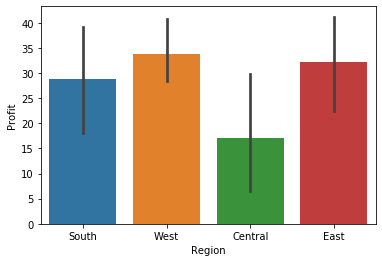

In [10]:
sns.barplot(x='Region' , y = 'Profit' , data=data)

## Stripplot between Ship Mode and Profit

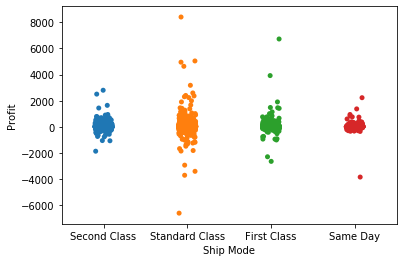

In [11]:
sns.stripplot(x='Ship Mode' , y = 'Profit' , data=data)

## PairPlot

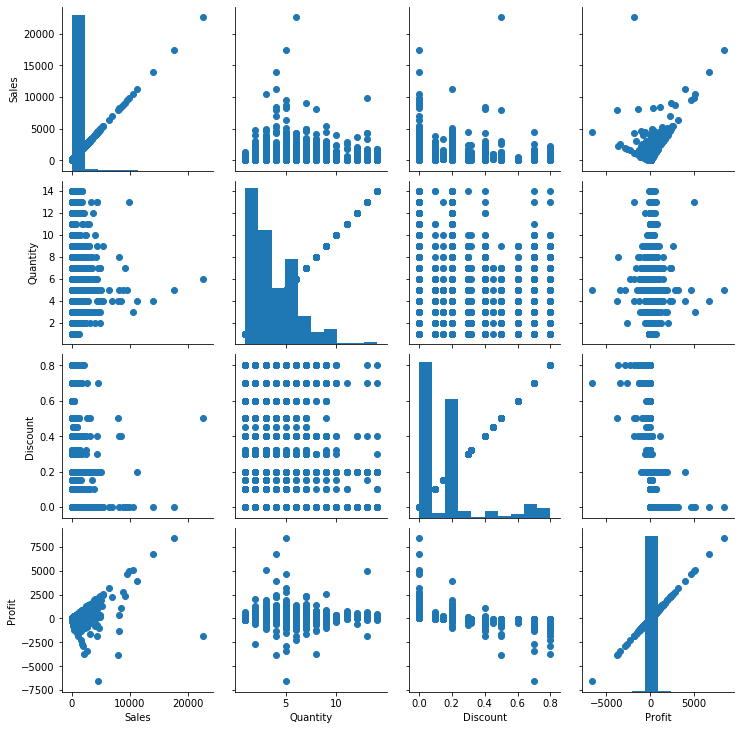

In [12]:
plot = sns.pairplot(data)
plot.map(plt.scatter)

## Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018F0C2C3588>,
      dtype=object)

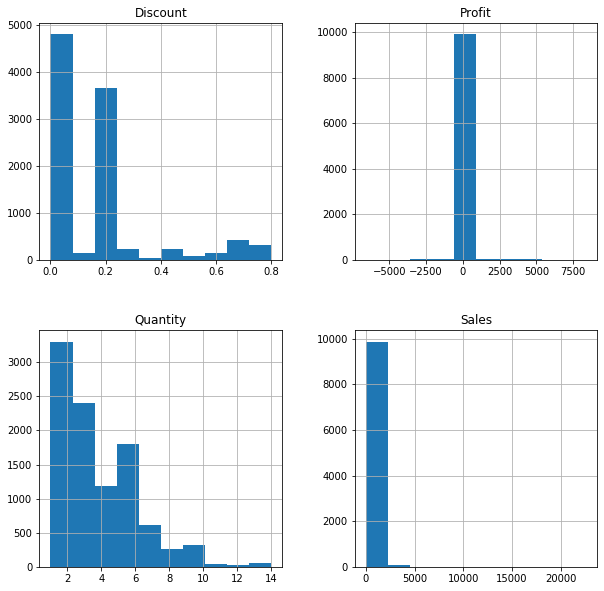

In [13]:
data.hist(figsize = (10,10) , bins = 10)

## Relation Plot between Sales and Profit

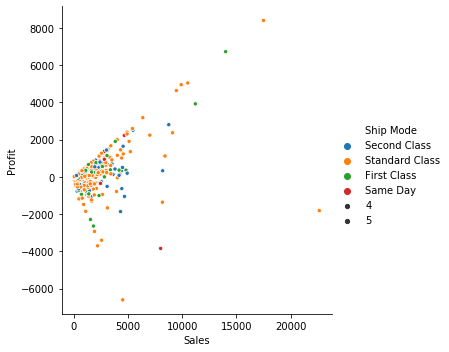

In [14]:
sns.relplot(x = 'Sales' , y ='Profit' , hue = 'Ship Mode'  ,data=data, size = 5)

## Countplot between region and Category

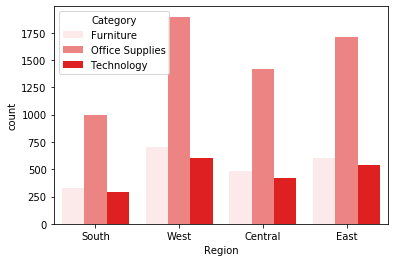

In [15]:
sns.countplot(x=data['Region'] , hue = data['Category'] , color = 'red')

## Countplot between region and Segment

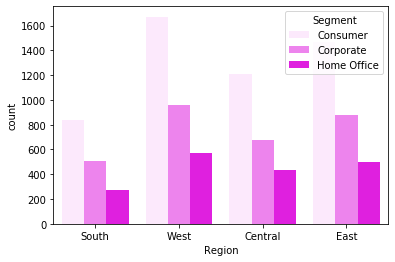

In [16]:
sns.countplot(x=data['Region'] , hue = data['Segment'] , color = 'magenta')

## Countplot between region and Ship Mode

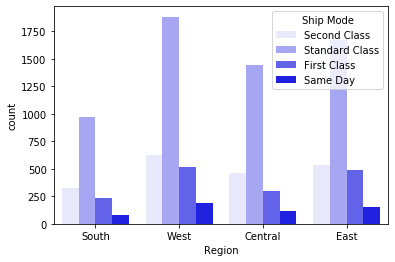

In [17]:
sns.countplot(x=data['Region'] , hue = data['Ship Mode'] , color = 'blue')

In [18]:
#finding cost of single item
data['cost'] = data['Sales']/data['Quantity']

#finding profit per sold items

data['Profit'] = data['Profit']/data['Quantity']

#Grouping Data
data_group_one = data[['Ship Mode','Segment','Category','Sub-Category','cost','Discount','Profit']]
data_group_one = data_group_one.groupby(['Ship Mode','Segment','Category','Sub-Category'],as_index=False).mean()

#Data for first Class & consumer
data_group_1 = data_group_one[data_group_one['Ship Mode'] == 'First Class']
data_group_1 = data_group_1[data_group_1['Segment'] == 'Consumer']

#Data for Same Day & consumer
data_group_2 = data_group_one[data_group_one['Ship Mode'] == 'Same Day']
data_group_2 = data_group_2[data_group_2['Segment'] == 'Consumer']

#Data for Second Class & consumer
data_group_3 = data_group_one[data_group_one['Ship Mode'] == 'Second Class' ]
data_group_3 = data_group_3[data_group_3['Segment'] == 'Consumer']

#Data for Standard Class & consumer
data_group_4 = data_group_one[data_group_one['Ship Mode'] == 'Standard Class']
data_group_4 = data_group_4[data_group_4['Segment'] == 'Consumer']

#Data for first Class & Corporate
data_group_11 = data_group_one[data_group_one['Ship Mode'] == 'First Class']
data_group_11 = data_group_11[data_group_11['Segment'] == 'Corporate']

#Data for Same Day & corporate
data_group_22 = data_group_one[data_group_one['Ship Mode'] == 'Same Day' ]
data_group_22 = data_group_22[data_group_22['Segment'] == 'Corporate']

#Data for Second Class & corporate
data_group_33 = data_group_one[data_group_one['Ship Mode'] == 'Second Class' ]
data_group_33 = data_group_33[data_group_33['Segment'] == 'Corporate']

#Data for Standard Class & corporate
data_group_44 = data_group_one[data_group_one['Ship Mode'] == 'Standard Class']
data_group_44 = data_group_44[data_group_44['Segment'] == 'Corporate']

#Data for First Class & Home Office
data_group_111 = data_group_one[data_group_one['Ship Mode'] == 'First Class']
data_group_111 = data_group_111[data_group_111['Segment'] == 'Home Office']

#Data for Same Day & Home Office
data_group_222 = data_group_one[data_group_one['Ship Mode'] == 'Same Day']
data_group_222 = data_group_222[data_group_222['Segment'] == 'Home Office']

#Data for Second Class & Home Office
data_group_333 = data_group_one[data_group_one['Ship Mode'] == 'Second Class']
data_group_333 = data_group_333[data_group_333['Segment'] == 'Home Office']

#Data for Standard Class & Home Office
data_group_444 = data_group_one[data_group_one['Ship Mode'] == 'Standard Class']
data_group_444 = data_group_444[data_group_444['Segment'] == 'Home Office']

In [19]:
data_group_1

,Ship Mode,Segment,Category,Sub-Category,cost,Discount,Profit
0,First Class,Consumer,Furniture,Bookcases,112.006431,0.219615,-3.730315
1,First Class,Consumer,Furniture,Chairs,143.274805,0.182927,6.655200
2,First Class,Consumer,Furniture,Furnishings,30.094775,0.125000,4.873847
3,First Class,Consumer,Furniture,Tables,158.668647,0.270588,-11.704588
4,First Class,Consumer,Office Supplies,Appliances,57.390222,0.106667,13.650020
5,First Class,Consumer,Office Supplies,Art,8.708590,0.088525,2.066900
6,First Class,Consumer,Office Supplies,Binders,47.134345,0.400000,7.733378
7,First Class,Consumer,Office Supplies,Envelopes,30.631500,0.100000,13.355225
8,First Class,Consumer,Office Supplies,Fasteners,3.217250,0.037500,1.145331
9,First Class,Consumer,Office Supplies,Labels,8.441000,0.093750,3.836563


In [20]:
data_group_2

,Ship Mode,Segment,Category,Sub-Category,cost,Discount,Profit
51,Same Day,Consumer,Furniture,Bookcases,281.308500,0.175000,12.584300
52,Same Day,Consumer,Furniture,Chairs,136.012050,0.150000,6.294550
53,Same Day,Consumer,Furniture,Furnishings,29.608125,0.231250,1.014825
54,Same Day,Consumer,Furniture,Tables,131.065667,0.275000,-13.217000
55,Same Day,Consumer,Office Supplies,Appliances,96.591667,0.158333,23.971658
56,Same Day,Consumer,Office Supplies,Art,10.207000,0.083333,2.496779
57,Same Day,Consumer,Office Supplies,Binders,21.718932,0.363636,5.481839
58,Same Day,Consumer,Office Supplies,Envelopes,11.188000,0.100000,4.745575
59,Same Day,Consumer,Office Supplies,Fasteners,2.849800,0.040000,1.118970
60,Same Day,Consumer,Office Supplies,Labels,9.639833,0.050000,3.868800


In [ ]:
data_group_3

In [ ]:
data_group_4

In [ ]:
data_group_11

In [ ]:
data_group_22

In [ ]:
data_group_33

In [ ]:
data_group_44

In [ ]:
data_group_111

In [ ]:
data_group_222

In [ ]:
data_group_333

In [ ]:
data_group_444

**Problem**

**Loss incurred items groupwise**


1.   data_group_1:Bookcases,Tables,Machines
2.   data_group_2:Tables
3.   data_group_3:Bookcases,Tables,Supplies
4.   data_group_4:Bookcases,Tables,Supplies,Machines
5.   data_group_111:Tables
6.   data_group_222:Chairs,Tables,Appliances
7.   data_group_333:Furnishings
8.   data_group_444:Tables

these are items where there is loss in above mentioned groupings according to ship Mode and segment of customers


**Solution**


1.   BookCases: In bookcases according to pattern shown in the data when cost per item is around 100 and discount is around 0.1% and where cost per item is around 200 and discount is around 0.2% there is profit.So,Discount in these items should increase by 0.1% per 100 increase in the cost of the item. 

2.   Tables: In case of tables where ever discount is around 0.2% there is loss
so discount here should be around 0.1%.

3.   Machines:The problem is with the segment consumer they buy less of this item so the cost should be increased and discount should be negligible.

4.   Supplies:Here problem in the ship mode where discount must be around 0.01 in first class while in standard class there should be no discount.

5.   Chairs:The problem is in discount given in same day home office delivery it around 0.2% while cost per item is only around 100 so it must be reduced around 0.1%.

6.   Appliances:here problem is with Same day home office delivery where cost per item is around 77 and discount is around .33% that must be reduced to 0.1%.
Extra charges must be levied for same day delivery.

7.   Furnishings:The problem is in second class home office delivery where discount is more than 3 time the same day delivery which causing loss it must be reduced below 0.05%.

